# Multiple Variable Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
df = pd.read_csv('train.csv')
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1000, 7)

In [4]:
x_df = df[['age','gender', 'bmi', 'children', 'smoker', 'region']]
x_df.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [5]:
y_df = df['charges']
y_df.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [6]:
# Integer encoding for gender
# 0 -> female   1 -> male

x_df['gender'] = x_df['gender'].replace(['female', 'male'], [0, 1])
x_df.head()

,age,gender,bmi,children,smoker,region
0,19,0,27.900,0,yes,southwest
1,18,1,33.770,1,no,southeast
2,28,1,33.000,3,no,southeast
3,33,1,22.705,0,no,northwest
4,32,1,28.880,0,no,northwest


In [7]:
# Integer encoding for smoker
# 0 -> no   1 -> yes

x_df['smoker'] = x_df['smoker'].replace(['no', 'yes'], [0, 1])
x_df.head()

,age,gender,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest


In [8]:
# One Hot Encoding for region

x_df = pd.get_dummies(x_df, columns=['region'])
x_df.head()

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [9]:
# set bmi to bmi^2

x_df['bmi'] = x_df['bmi']**2
x_df.head()

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,778.410000,0,1,0,0,0,1
1,18,1,1140.412900,1,0,0,0,1,0
2,28,1,1089.000000,3,0,0,0,1,0
3,33,1,515.517025,0,0,0,1,0,0
4,32,1,834.054400,0,0,0,1,0,0


## 1. Closed Form

In [10]:
n = x_df.shape[0]   # number of training samples
X = np.concatenate((np.ones((n, 1)), x_df), axis=1)   # add a coloumn of ones to X (for future calculations)

In [11]:
# main part of approach
theta_CF = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_df))
print(theta_CF)

[ 8.19200000e+03  2.31602125e+02 -1.44537896e+03  4.88367638e+00
  3.15258139e+02  2.34179835e+04 -2.45760000e+04 -2.86720000e+04
 -2.86720000e+04 -3.27680000e+04]


### Test Error - step by step

In [12]:
# Load Testset
test_df = pd.read_csv('test.csv')
test_df.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [13]:
x_test_df = test_df[['age','gender', 'bmi', 'children', 'smoker', 'region']]
x_test_df.head()

,age,gender,bmi,children,smoker,region
0,30,male,22.99,2,yes,northwest
1,24,male,32.70,0,yes,southwest
2,24,male,25.80,0,no,southwest
3,48,male,29.60,0,no,southwest
4,47,male,19.19,1,no,northeast


In [14]:
y_test_df = test_df['charges']
y_test_df.head()

0    17361.76610
1    34472.84100
2     1972.95000
3    21232.18226
4     8627.54110
Name: charges, dtype: float64

In [15]:
# Testset preparation

# Integer encoding for gender
x_test_df['gender'] = x_test_df['gender'].replace(['female', 'male'], [0, 1])

# Integer encoding for smoker
x_test_df['smoker'] = x_test_df['smoker'].replace(['no', 'yes'], [0, 1])

# One Hot Encoding for region
x_test_df = pd.get_dummies(x_test_df, columns=['region'])

# set bmi to bmi^2
x_test_df['bmi'] = x_test_df['bmi']**2
x_test_df.head()

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,30,1,528.5401,2,1,0,1,0,0
1,24,1,1069.2900,0,1,0,0,0,1
2,24,1,665.6400,0,0,0,0,0,1
3,48,1,876.1600,0,0,0,0,0,1
4,47,1,368.2561,1,0,1,0,0,0


In [16]:
# main part of approach

J = []   # cost values in each iteration 
step_size = 10
n_test = x_test_df.shape[0]
X_test = np.concatenate((np.ones((n_test, 1)), x_test_df), axis=1) 

for i in range(1, 101):
    
    # add 10 other train data in each iteration
    X_ = X[0:i*step_size]
    Y = y_df[0:i*step_size]
    theta_CF = np.dot(np.linalg.pinv(np.dot(X_.T, X_)), np.dot(X_.T, Y))
#     print('Iteration:', i, '\nCalculated theta:', theta_CF, '\n-----------------')
    
    # calculate cost(J) in each iteration for testset
    y_hat = X_test@theta_CF
    cost = np.sum((y_hat - y_test_df)**2)/(2*n_test)
    J.append(cost)
#     print('Iteration:', i, '\nCost:', cost, '\n--------------------------')


Text(0, 0.5, 'J')

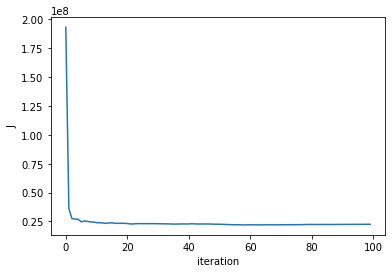

In [17]:
# Plot test error for each iteration
iteration = np.array([i for i in range(len(J))])
plt.plot(iteration, J)
plt.xlabel('iteration')
plt.ylabel('J')

## 2. Stochastic Gradient Descent

In [18]:
learning_rate = 0.01
iterations = 10
m = x_df.shape[1]   # number of features
W = np.random.randn(m + 1, )

In [19]:
# main part of approach
grad = np.zeros(len(W))

for i in range(iterations):
    y_hat = X@W   # or X.dot(W)
    
#     print(np.sum((y_hat - y_df)**2)/(2*n))
    
    # update parameters after considering each sample
    for j in range(n):   # iterate on samples
        for k in range(len(W)):   # iterate on features (to find all thetas)
            grad[k] = (X[j][k]*(y_hat[j] - y_df[j]))
            W[k] -= learning_rate * grad[k]


print(W)

[-3.72549697e+68 -1.49858319e+70 -1.88771869e+68 -4.24148125e+71
 -4.06801712e+68 -7.25565613e+67 -8.45561222e+67 -7.71000548e+67
 -1.20859787e+68 -9.00337332e+67]


In [20]:
# Train error 
# using the results from this approch

y_hat = X@W
cost = np.sum((y_hat - y_df)**2)/(2*n)
print('Train Error =', cost)

Train Error = 1.0156151604544601e+149


In [21]:
# Test error

y_hat = X_test@W
cost = np.sum((y_hat - y_test_df)**2)/(2*n)
print('Test Error =', cost)

Test Error = 1.4166642084528117e+148


## 3. Batch Gradient Descent

In [22]:
learning_rate = 0.01
iterations = 10
W = np.random.randn(m + 1, )

In [23]:
# main part of approach
grad = np.zeros(len(W))

for i in range(iterations):
    y_hat = X@W
    
#     print(np.sum((y_hat - y_df)**2)/(2*n))
    
    # update parameters after considering all samples
    for k in range(len(W)):   # iterate on features (to find all thetas)
        grad[k] = (X[:,k]@(y_hat - y_df))/n
        W[k] -= learning_rate * grad[k]
    
    # OR 
#     for k in range(len(W)): 
#         grad[k] = 0
#         for j in range(n):
#             grad[k] += (X[j][k]*(y_hat[j] - y_df[j]))/n
#         W[k] -= learning_rate * grad[k]
    
print(W)

[-3.45098197e+38 -1.38815938e+40 -1.74862125e+38 -3.92894570e+41
 -3.76826336e+38 -6.72101968e+37 -7.83255645e+37 -7.14189009e+37
 -1.11954176e+38 -8.33995551e+37]


In [24]:
# Train error 

y_hat = X@W
cost = np.sum((y_hat - y_df)**2)/(2*n)
print('Train Error =', cost)

Train Error = 8.71457327385375e+88


In [25]:
# Test error

y_hat = X_test@W
cost = np.sum((y_hat - y_test_df)**2)/(2*n)
print('Test Error =', cost)

Test Error = 1.2155809138851099e+88


## Regularization
using in closed form approach

In [36]:
# Training set

lambda_list = np.array([10**i for i in range(-4,5)])
cost_list = []

for lamb in lambda_list:
    
    W = np.linalg.solve(np.dot(X.T, X) + lamb * np.identity(m+1), np.dot(X.T, y_df))
    
    y_hat = X@W
    cost = (np.sum((y_hat - y_df)**2) + lamb*np.sum(W**2)) / (2*n)
    cost_list.append(cost)
    print('Lambda =', lamb, '\nCost =', cost)
    

Lambda = 0.0001 
Cost = 17581563.591486987
Lambda = 0.001 
Cost = 17581839.520145327
Lambda = 0.01 
Cost = 17584598.602294542
Lambda = 0.1 
Cost = 17612168.997630365
Lambda = 1.0 
Cost = 17885847.434374835
Lambda = 10.0 
Cost = 20435679.77097181
Lambda = 100.0 
Cost = 35459514.6753026
Lambda = 1000.0 
Cost = 56441706.11423529
Lambda = 10000.0 
Cost = 62047717.06401737


Text(0, 0.5, 'J')

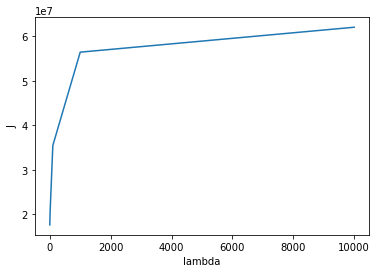

In [37]:
# Plot train error for each value of lambda
plt.plot(lambda_list, cost_list)
plt.xlabel('lambda')
plt.ylabel('J')

In [38]:
# Test set

lambda_list = np.array([10**i for i in range(-4,5)])
cost_list = []

for lamb in lambda_list:
    
    W = np.linalg.solve(np.dot(X_test.T, X_test) + lamb * np.identity(m+1), np.dot(X_test.T, y_test_df))
    
    y_hat = X_test@W
    cost = (np.sum((y_hat - y_test_df)**2) + lamb*np.sum(W**2)) / (2*n)
    cost_list.append(cost)
    print('Lambda =', lamb, '\nCost =', cost)
    

Lambda = 0.0001 
Cost = 3167558.5104087405
Lambda = 0.001 
Cost = 3167823.614074716
Lambda = 0.01 
Cost = 3170473.5339472373
Lambda = 0.1 
Cost = 3196861.5997018134
Lambda = 1.0 
Cost = 3450143.9188606506
Lambda = 10.0 
Cost = 5255505.516968164
Lambda = 100.0 
Cost = 9111046.985258732
Lambda = 1000.0 
Cost = 10526739.404768612
Lambda = 10000.0 
Cost = 10785947.894155068


Text(0, 0.5, 'J')

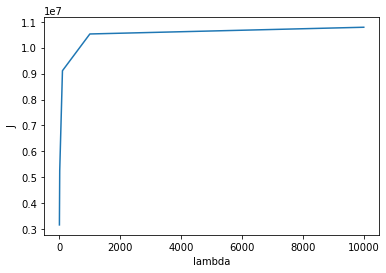

In [39]:
# Plot test error for each value of lambda
plt.plot(lambda_list, cost_list)
plt.xlabel('lambda')
plt.ylabel('J')